In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


#ipmorted the Necesary ibrary for now

C:\Users\HP\AppData\Local\Temp\ipykernel_10580\305815295.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Financial Consumer Complaints.csv',encoding='latin-1') #read The file
df.info() #data infomation
print('\n') #nect line
print('*'*127) # demecation
df.head() #getting the top 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75513 entries, 0 to 75512
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ï»¿Complaint ID               75513 non-null  int64 
 1   Date Sumbited                 75513 non-null  object
 2   Product                       75513 non-null  object
 3   Sub-product                   75513 non-null  object
 4   Issue                         75513 non-null  object
 5   Sub-issue                     74762 non-null  object
 6   Company public response       27335 non-null  object
 7   Company                       75513 non-null  object
 8   State                         72620 non-null  object
 9   ZIP code                      71146 non-null  object
 10  Tags                          8953 non-null   object
 11  Consumer consent provided?    23339 non-null  object
 12  Submitted via                 75513 non-null  object
 13  Date Received   

,ï»¿Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2/24/18,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,Cumulus Financial,FL,33179,NaN,Consent not provided,Web,2/24/18,Closed with explanation,Yes,NaN
1,1515991,8/12/15,Debt collection,Credit card,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Cumulus Financial,CA,93561,NaN,Consent not provided,Web,8/12/15,Closed with explanation,Yes,No
2,1145261,12/5/14,Bank account or service,Checking account,Deposits and withdrawals,"""""",NaN,Cumulus Financial,CA,91792,NaN,NaN,Referral,12/8/14,Closed with explanation,Yes,No
3,2573763,7/13/17,Mortgage,Conventional home mortgage,Trouble during payment process,"""""",Company has responded to the consumer and the ...,Cumulus Financial,CA,92629,NaN,Consent not provided,Web,7/13/17,Closed with explanation,Yes,NaN
4,2573113,7/13/17,Mortgage,Conventional home mortgage,Struggling to pay mortgage,"""""",NaN,Cumulus Financial,NY,10016,NaN,Consent not provided,Web,7/13/17,Closed with explanation,Yes,NaN


>first And foremost understanding The Data is the key.

> Missing data ✅✅

>Objective we want to carry Explaatory analysis, so as to uncover the hidden trendd.

In [3]:
#first we sketch library to help us with the data description 

import sketch

df.sketch.ask('Can you kindly give me Friendly Names and single sentence Descriptionof each column ?(format output as HTML List)')

In [4]:
#using The data description to look at the nature of the eacj columns


df.head(2)

,ï»¿Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2/24/18,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,Cumulus Financial,FL,33179,NaN,Consent not provided,Web,2/24/18,Closed with explanation,Yes,NaN
1,1515991,8/12/15,Debt collection,Credit card,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Cumulus Financial,CA,93561,NaN,Consent not provided,Web,8/12/15,Closed with explanation,Yes,No


<AxesSubplot:title={'center':'Data Types?'}, ylabel='None'>

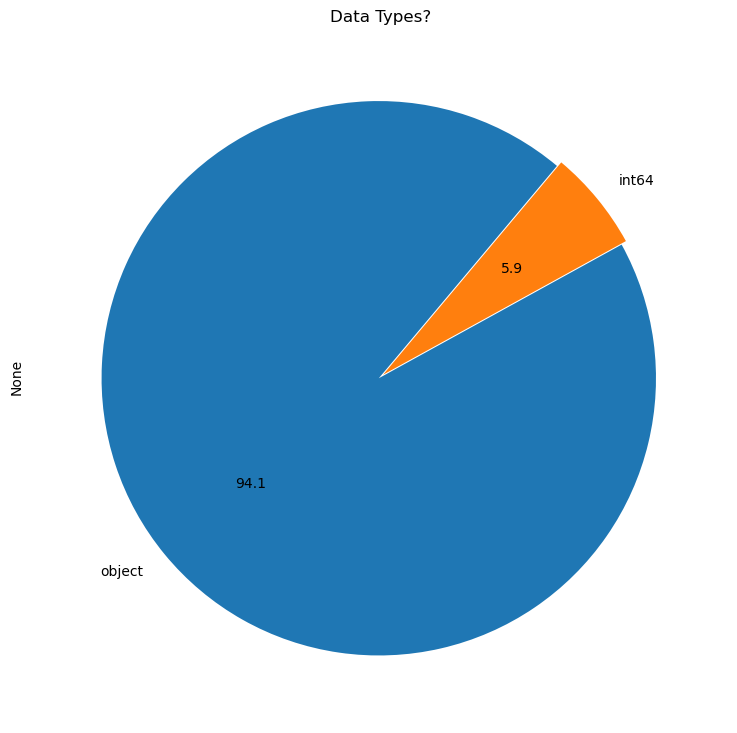

In [5]:
#plotting out the data of daataset we working with

df.dtypes.value_counts().plot.pie(figsize=(13,9),autopct='%.1f',explode=[0.01,0.01],title='Data Types?',startangle=50)

Majority Of our Data is made up of Object

In [6]:
print('The Dataset is made up of :',df.shape[0],'rows &',df.shape[1] ,'columns')

The Dataset is made up of : 75513 rows & 17 columns


In [7]:
#let handle our msising Data?

print('*'*127)
print(df.isnull().sum())

print('*'*127) #Ignore 😎

print('In Percentage \n')
#let Look at it in Percentage 

df.isnull().sum()/len(df)*100

*******************************************************************************************************************************
ï»¿Complaint ID                     0
Date Sumbited                       0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                         751
Company public response         48178
Company                             0
State                            2893
ZIP code                         4367
Tags                            66560
Consumer consent provided?      52174
Submitted via                       0
Date Received                       0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              36947
dtype: int64
*******************************************************************************************************************************
In Percentage 



ï»¿Complaint ID                  0.000000
Date Sumbited                    0.000000
Product                          0.000000
Sub-product                      0.000000
Issue                            0.000000
Sub-issue                        0.994531
Company public response         63.800935
Company                          0.000000
State                            3.831128
ZIP code                         5.783110
Tags                            88.143763
Consumer consent provided?      69.092739
Submitted via                    0.000000
Date Received                    0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?              48.927999
dtype: float64

> We gat Mass amount of Missing data?

>out of 75513 Data we gat columns name (Tags) gat 66560 Missing Data , I believe am dropping this chart off the chat, inclluding consumer consent provided and company Public response.

Why ?

because they got massive amount of missing Data, but before that let plot it so you see it.

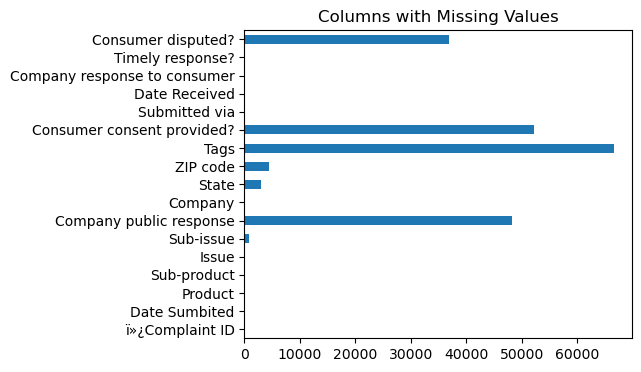

In [8]:
#plotting out The Columns With missing values

df.isnull().sum().plot.barh(figsize=(5,4),title='Columns with Missing Values');

Accordidng to the viusalization Consumer disputed,consumer constent provided,Tags,company public response columsn will be considered drop due to massive missing Values

In [9]:
#but before dropping, let The Nature of the data

def checking(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(f'{i}:{df[i].unique()}')

In [10]:
checking(df)

Date Sumbited:['2/24/18' '8/12/15' '12/5/14' ... '6/23/18' '4/25/15' '3/27/16']
Product:['Credit card or prepaid card' 'Debt collection' 'Bank account or service'
 'Mortgage' 'Credit card' 'Checking or savings account' 'Student loan'
 'Vehicle loan or lease']
Sub-product:['General-purpose credit card or charge card' 'Credit card'
 'Checking account' 'Conventional home mortgage' '""' 'Mortgage'
 'Other mortgage' 'Store credit card' 'Non-federal student loan'
 'Other type of mortgage' 'FHA mortgage' 'Conventional fixed mortgage'
 'Savings account' 'Other debt' 'Other banking product or service'
 'Credit card debt' 'Other bank product/service' 'Loan' 'Medical debt'
 'I do not know' 'Home equity loan or line of credit (HELOC)'
 'VA mortgage' 'Mortgage debt' 'Conventional adjustable mortgage (ARM)'
 '(CD) Certificate of deposit' 'Auto' 'Private student loan'
 'Reverse mortgage' 'CD (Certificate of Deposit)' 'Gift card' 'Auto debt'
 'Lease' 'Cashing a check without an account'
 'General-purp

In [11]:
#dropingg theh nan columns

df=df.drop(['Company public response','Consumer consent provided?','Tags','Consumer disputed?'],axis=1)

df.isnull().sum()

ï»¿Complaint ID                    0
Date Sumbited                      0
Product                            0
Sub-product                        0
Issue                              0
Sub-issue                        751
Company                            0
State                           2893
ZIP code                        4367
Submitted via                      0
Date Received                      0
Company response to consumer       0
Timely response?                   0
dtype: int64

In [12]:
#haven't drop those columns we till gat  missing Value 

df[df.isnull().any(axis=1)] #now we plotting direct to the Missing Values

,ï»¿Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date Received,Company response to consumer,Timely response?
15,474588,8/5/13,Student loan,Non-federal student loan,Problems when you are unable to pay,NaN,Cumulus Financial,NY,10467,Phone,8/8/13,Closed with explanation,Yes
37,2630848,8/16/17,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,Cumulus Financial,NaN,NaN,Referral,8/16/17,Closed with explanation,Yes
84,2829514,3/1/18,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Problem related to refinancing,Cumulus Financial,IL,NaN,Web,3/1/18,Closed with explanation,Yes
88,2718765,11/1/17,Checking or savings account,Other banking product or service,Managing an account,Problem making or receiving payments,Cumulus Financial,NaN,NaN,Referral,11/3/17,Closed with explanation,Yes
109,2814309,2/15/18,Checking or savings account,Checking account,Problem caused by your funds being low,Non-sufficient funds and associated fees,Cumulus Financial,NaN,NaN,Phone,2/15/18,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75427,3016985,9/12/18,Vehicle loan or lease,Loan,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,Cumulus Financial,NY,NaN,Web,9/12/18,Closed with non-monetary relief,Yes
75454,3063944,11/2/18,Checking or savings account,CD (Certificate of Deposit),Managing an account,Funds not handled or disbursed as instructed,Cumulus Financial,IN,NaN,Web,11/2/18,Closed with explanation,Yes
75464,3077815,11/16/18,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,Cumulus Financial,NaN,NaN,Referral,11/19/18,Closed with explanation,Yes
75472,3073643,11/13/18,Mortgage,Conventional home mortgage,Struggling to pay mortgage,"""""",Cumulus Financial,NaN,NaN,Referral,11/14/18,Closed with explanation,Yes


In [13]:
#taking down all of the missing dadta 

df=df.dropna()

df.isnull().sum()

ï»¿Complaint ID                 0
Date Sumbited                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Date Received                   0
Company response to consumer    0
Timely response?                0
dtype: int64

>>>MOrelife to pandas dropna,that funcion make life easy.

In [14]:
#now Let hcek How many rows we working with ?

print('After deleting All of Missing values, We Want to know Many rows we are left with :',df.shape[0])

After deleting All of Missing values, We Want to know Many rows we are left with : 70385


In [15]:
#Okay we good to go 

#new Start 😎
df.head()

,ï»¿Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date Received,Company response to consumer,Timely response?
0,2824926,2/24/18,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Cumulus Financial,FL,33179,Web,2/24/18,Closed with explanation,Yes
1,1515991,8/12/15,Debt collection,Credit card,Improper contact or sharing of info,Contacted employer after asked not to,Cumulus Financial,CA,93561,Web,8/12/15,Closed with explanation,Yes
2,1145261,12/5/14,Bank account or service,Checking account,Deposits and withdrawals,"""""",Cumulus Financial,CA,91792,Referral,12/8/14,Closed with explanation,Yes
3,2573763,7/13/17,Mortgage,Conventional home mortgage,Trouble during payment process,"""""",Cumulus Financial,CA,92629,Web,7/13/17,Closed with explanation,Yes
4,2573113,7/13/17,Mortgage,Conventional home mortgage,Struggling to pay mortgage,"""""",Cumulus Financial,NY,10016,Web,7/13/17,Closed with explanation,Yes


In [17]:
#okay We gat Problem ? 
# we gat some invalid data in the columns name sub issue.
import re

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
        
df['Sub-issue']=df['Sub-issue'].apply(preprocessor)

In [18]:
df['Sub-issue'].isnull().sum()

0

In [19]:
df.head()

,ï»¿Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date Received,Company response to consumer,Timely response?
0,2824926,2/24/18,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,company closed your account,Cumulus Financial,FL,33179,Web,2/24/18,Closed with explanation,Yes
1,1515991,8/12/15,Debt collection,Credit card,Improper contact or sharing of info,contacted employer after asked not to,Cumulus Financial,CA,93561,Web,8/12/15,Closed with explanation,Yes
2,1145261,12/5/14,Bank account or service,Checking account,Deposits and withdrawals,,Cumulus Financial,CA,91792,Referral,12/8/14,Closed with explanation,Yes
3,2573763,7/13/17,Mortgage,Conventional home mortgage,Trouble during payment process,,Cumulus Financial,CA,92629,Web,7/13/17,Closed with explanation,Yes
4,2573113,7/13/17,Mortgage,Conventional home mortgage,Struggling to pay mortgage,,Cumulus Financial,NY,10016,Web,7/13/17,Closed with explanation,Yes


In [20]:
#get The Date column into proper format

df['Date Sumbited']=pd.to_datetime(df['Date Sumbited'],errors='coerce')
df['Date Received']=pd.to_datetime(df['Date Received'],errors='coerce')

In [21]:
#Rename the columns

df=df.rename(columns={'ï»¿Complaint ID':'Complaint ID'})

In [22]:
df.sample()

,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date Received,Company response to consumer,Timely response?
64421,3730513,2020-07-02,Checking or savings account,Checking account,Problem with a lender or other company chargin...,transaction was not authorized,Cumulus Financial,NY,11720,Referral,2020-07-06,Closed with explanation,Yes


In [23]:
#CHecking If the Receieved date and submitted Date are the same 

df[df['Date Received']!=df['Date Sumbited']]

,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date Received,Company response to consumer,Timely response?
2,1145261,2014-12-05,Bank account or service,Checking account,Deposits and withdrawals,,Cumulus Financial,CA,91792,Referral,2014-12-08,Closed with explanation,Yes
6,2395777,2017-03-20,Debt collection,Mortgage,Cont'd attempts collect debt not owed,debt resulted from identity theft,Cumulus Financial,GA,30519,Referral,2017-03-21,Closed with explanation,Yes
7,2850771,2018-03-19,Checking or savings account,Checking account,Managing an account,deposits and withdrawals,Cumulus Financial,NV,89048,Referral,2018-03-21,Closed with monetary relief,Yes
10,96200,2012-06-06,Credit card,"""""",Billing disputes,,Cumulus Financial,NY,11419,Referral,2012-06-13,Closed with monetary relief,Yes
14,2358491,2017-02-24,Credit card,"""""",Other fee,,Cumulus Financial,CA,94061,Phone,2017-02-28,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75503,3074347,2018-11-14,Checking or savings account,Checking account,Managing an account,funds not handled or disbursed as instructed,Cumulus Financial,NY,10703,Phone,2018-11-16,Closed with explanation,Yes
75505,3125690,2019-01-15,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,credit card company isn t resolving a dispute ...,Cumulus Financial,OH,43219,Referral,2019-01-23,Closed with monetary relief,Yes
75507,3130941,2019-01-22,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,application denied,Cumulus Financial,NV,89135,Referral,2019-01-23,Closed with explanation,Yes
75510,3141604,2019-02-01,Checking or savings account,Checking account,Managing an account,deposits and withdrawals,Cumulus Financial,MD,20874,Referral,2019-02-04,Closed with explanation,Yes


Fortunately it appear that they ain't same thing.

In [24]:
#so creating New table and we call The tcolumns name Processing

df['Processing']=df['Date Received']-df['Date Sumbited']

In [25]:
df.head()

,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date Received,Company response to consumer,Timely response?,Processing
0,2824926,2018-02-24,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,company closed your account,Cumulus Financial,FL,33179,Web,2018-02-24,Closed with explanation,Yes,0 days
1,1515991,2015-08-12,Debt collection,Credit card,Improper contact or sharing of info,contacted employer after asked not to,Cumulus Financial,CA,93561,Web,2015-08-12,Closed with explanation,Yes,0 days
2,1145261,2014-12-05,Bank account or service,Checking account,Deposits and withdrawals,,Cumulus Financial,CA,91792,Referral,2014-12-08,Closed with explanation,Yes,3 days
3,2573763,2017-07-13,Mortgage,Conventional home mortgage,Trouble during payment process,,Cumulus Financial,CA,92629,Web,2017-07-13,Closed with explanation,Yes,0 days
4,2573113,2017-07-13,Mortgage,Conventional home mortgage,Struggling to pay mortgage,,Cumulus Financial,NY,10016,Web,2017-07-13,Closed with explanation,Yes,0 days


In [26]:
def connfirming(df):
    for i in df.columns:
        print('Data Uniqueness {}:{}'.format(i,df[i].nunique()))

In [27]:
connfirming(df)

Data Uniqueness Complaint ID:70385
Data Uniqueness Date Sumbited:3233
Data Uniqueness Product:8
Data Uniqueness Sub-product:46
Data Uniqueness Issue:84
Data Uniqueness Sub-issue:169
Data Uniqueness Company:1
Data Uniqueness State:61
Data Uniqueness ZIP code:10863
Data Uniqueness Submitted via:6
Data Uniqueness Date Received:3112
Data Uniqueness Company response to consumer:8
Data Uniqueness Timely response?:2
Data Uniqueness Processing:183


In [28]:
print('The Company which The Patient Submitting all of their complaint to Is called CUMULUS FINANCIAL INSTITUTION')

The Company which The Patient Submitting all of their complaint to Is called CUMULUS FINANCIAL INSTITUTION


In [29]:
# what Are The product They sell to This consumer ?

list(df['Product'].unique())

['Credit card or prepaid card',
 'Debt collection',
 'Bank account or service',
 'Mortgage',
 'Credit card',
 'Checking or savings account',
 'Student loan',
 'Vehicle loan or lease']

> The Company provide credit card,loan ,Bank services,student loan etc.

In [30]:
#what Are the Major Costumer complaint?

list(df['Issue'].unique())

['Closing your account',
 'Improper contact or sharing of info',
 'Deposits and withdrawals',
 'Trouble during payment process',
 'Struggling to pay mortgage',
 'Billing disputes',
 "Cont'd attempts collect debt not owed",
 'Managing an account',
 'Settlement process and costs',
 'False statements or representation',
 'Other fee',
 'Transaction issue',
 'Closing on a mortgage',
 'Closing an account',
 'Credit decision / Underwriting',
 'Credit determination',
 'Other',
 'Opening an account',
 'Took or threatened to take negative or legal action',
 'Closing/Cancelling account',
 'Problems caused by my funds being low',
 'Unsolicited issuance of credit card',
 'Attempts to collect debt not owed',
 "Can't repay my loan",
 'Getting a credit card',
 'Problem with a purchase shown on your statement',
 'Problem when making payments',
 'Identity theft / Fraud / Embezzlement',
 'Payoff process',
 'Credit line increase/decrease',
 'Problem caused by your funds being low',
 'Taking/threatening an

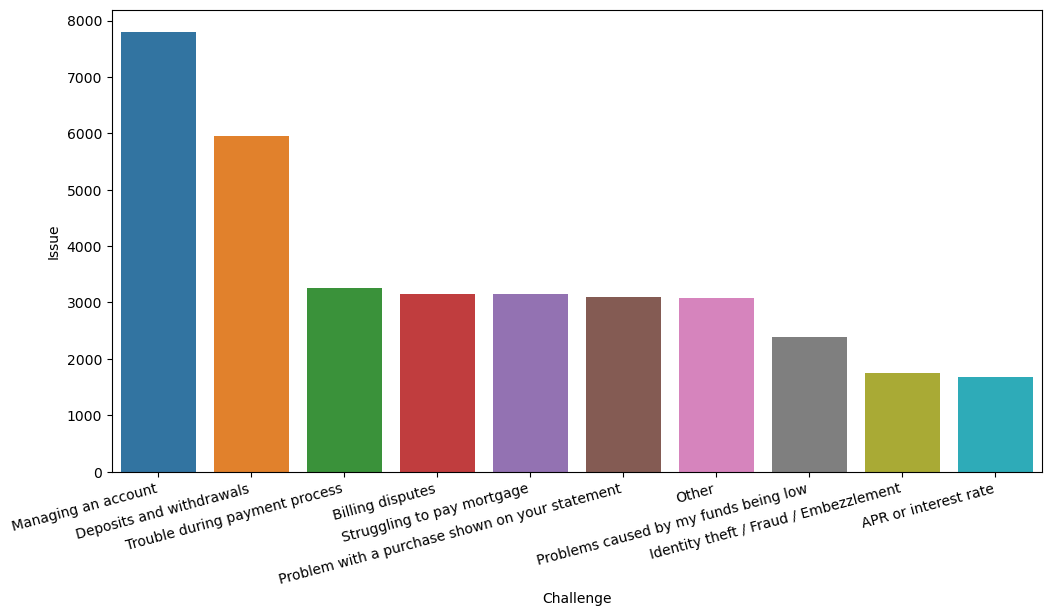

In [51]:
#most common problem ?

data=pd.DataFrame(df['Issue'].value_counts()).reset_index().rename(columns={'index':'Challenge'})

plt.figure(figsize=(12,6),dpi=100)
sns.barplot(data=data[:10],x='Challenge',y='Issue')
plt.xticks(rotation=15,ha='right');

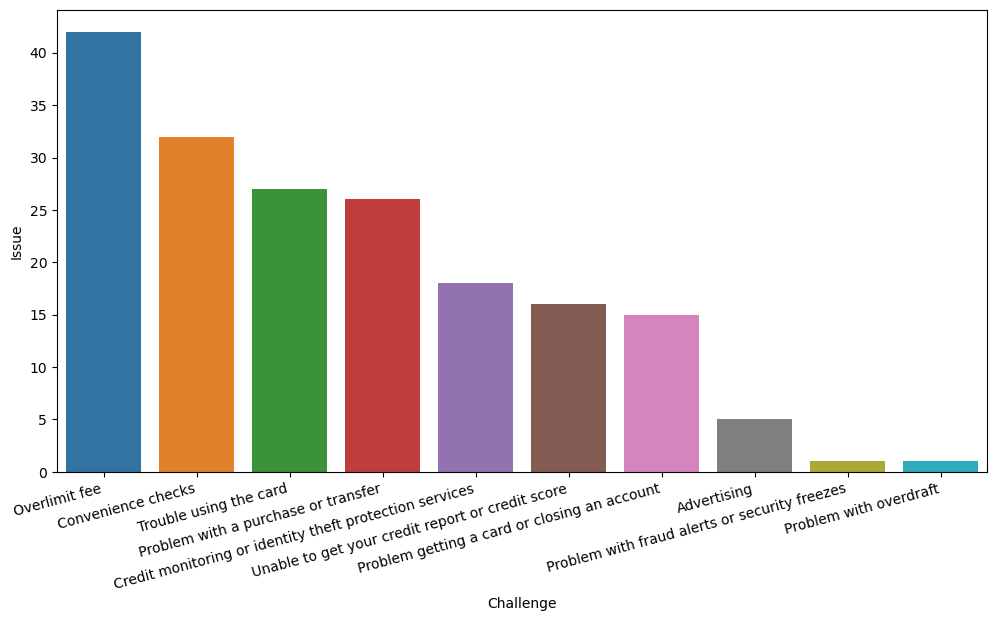

In [53]:
#The Least {problem}

plt.figure(figsize=(12,6),dpi=100)
sns.barplot(data=data.tail(10),x='Challenge',y='Issue')
plt.xticks(rotation=15,ha='right');

In [31]:
#Now let Dive more dipper 
#which  Year We gat of all This complaint?

df['YearSumbited']=pd.DatetimeIndex(df['Date Sumbited']).year

In [32]:
df.head()

,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date Received,Company response to consumer,Timely response?,Processing,YearSumbited
0,2824926,2018-02-24,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,company closed your account,Cumulus Financial,FL,33179,Web,2018-02-24,Closed with explanation,Yes,0 days,2018
1,1515991,2015-08-12,Debt collection,Credit card,Improper contact or sharing of info,contacted employer after asked not to,Cumulus Financial,CA,93561,Web,2015-08-12,Closed with explanation,Yes,0 days,2015
2,1145261,2014-12-05,Bank account or service,Checking account,Deposits and withdrawals,,Cumulus Financial,CA,91792,Referral,2014-12-08,Closed with explanation,Yes,3 days,2014
3,2573763,2017-07-13,Mortgage,Conventional home mortgage,Trouble during payment process,,Cumulus Financial,CA,92629,Web,2017-07-13,Closed with explanation,Yes,0 days,2017
4,2573113,2017-07-13,Mortgage,Conventional home mortgage,Struggling to pay mortgage,,Cumulus Financial,NY,10016,Web,2017-07-13,Closed with explanation,Yes,0 days,2017


In [33]:
#Out Thousand s of complaint that has been submittd , how mnay were Received ?

df['YearReceived']=pd.DatetimeIndex(df['Date Received']).year

In [34]:
#in figure

df['YearSumbited'].value_counts()

2018    10283
2017     9075
2019     9032
2014     8267
2020     7141
2016     6857
2013     6507
2012     6498
2015     6384
2011      341
Name: YearSumbited, dtype: int64

In [35]:
#Out Thousand s of complaint that has been submittd , how mnay were Received ?

df['YearReceived'].value_counts()

2018    10287
2017     9069
2019     9039
2014     8331
2020     7162
2016     6875
2013     6464
2012     6455
2015     6376
2011      327
Name: YearReceived, dtype: int64

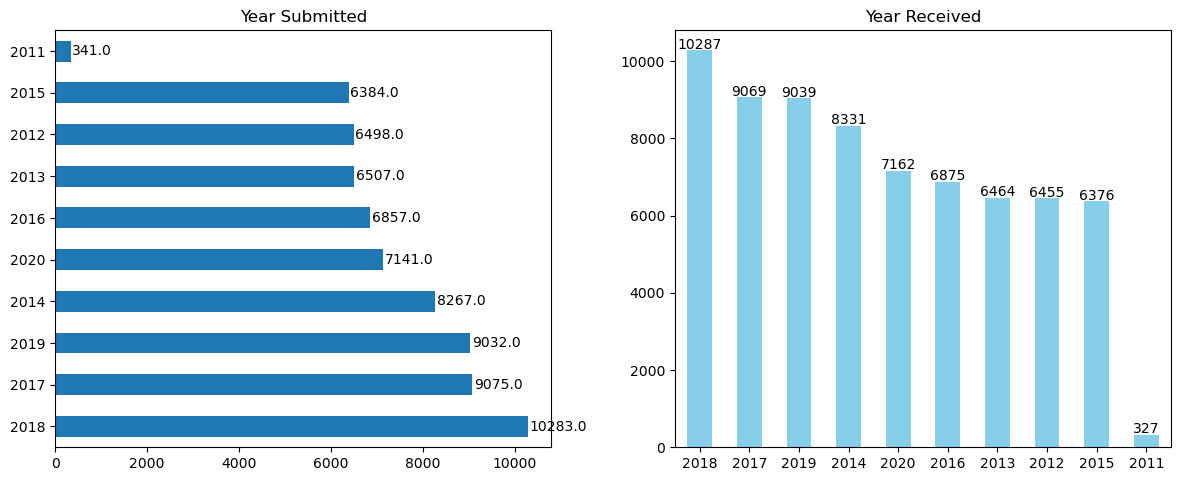

In [36]:
#Out Thousand s of complaint that has been submittd , how mnay were submitted AND how many were receieved?


fig,ax=plt.subplots(1,2)
labels=df['YearSumbited'].value_counts().plot.barh(figsize=(10,5),title='Year Submitted',ax=ax[0])
plt.xticks(rotation=0);
label=df['YearReceived'].value_counts().plot.bar(figsize=(13,6),title='Year Received',ax=ax[1],color='skyblue')
plt.xticks(rotation=0)
plt.tight_layout(pad=5)

for container in label.containers:
    label.bar_label(container,label_type='edge',padding=-1)
for container in labels.containers:
    labels.bar_label(container,label_type='edge',padding=1,fmt='%1.1f')

In [37]:
#let check the Onces left behinde

df['YearSumbited'].value_counts().sum()-df['YearReceived'].value_counts().sum()

0

In [38]:
#whcih State has the most complaint The Most ?

df['State'].value_counts()[:10]

CA    11925
NY     6664
FL     6595
TX     5402
NJ     3173
GA     2955
IL     2628
PA     2328
AZ     1903
OH     1894
Name: State, dtype: int64

<AxesSubplot:title={'center':'Submission complain Platform Used the Most?'}>

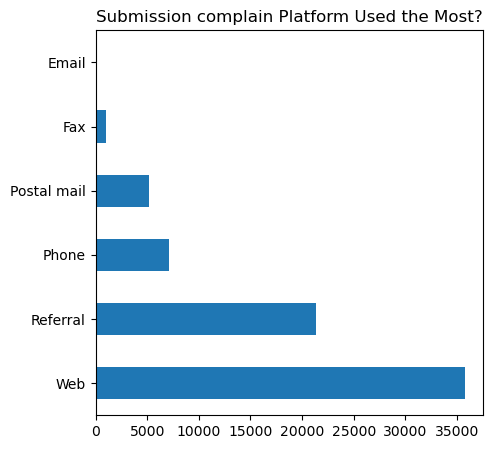

In [39]:
#how do They submitt their complain

df['Submitted via'].value_counts().plot.barh(figsize=(5,5),title='Submission complain Platform Used the Most?')

<AxesSubplot:title={'center':'Time Response'}, ylabel='Timely response?'>

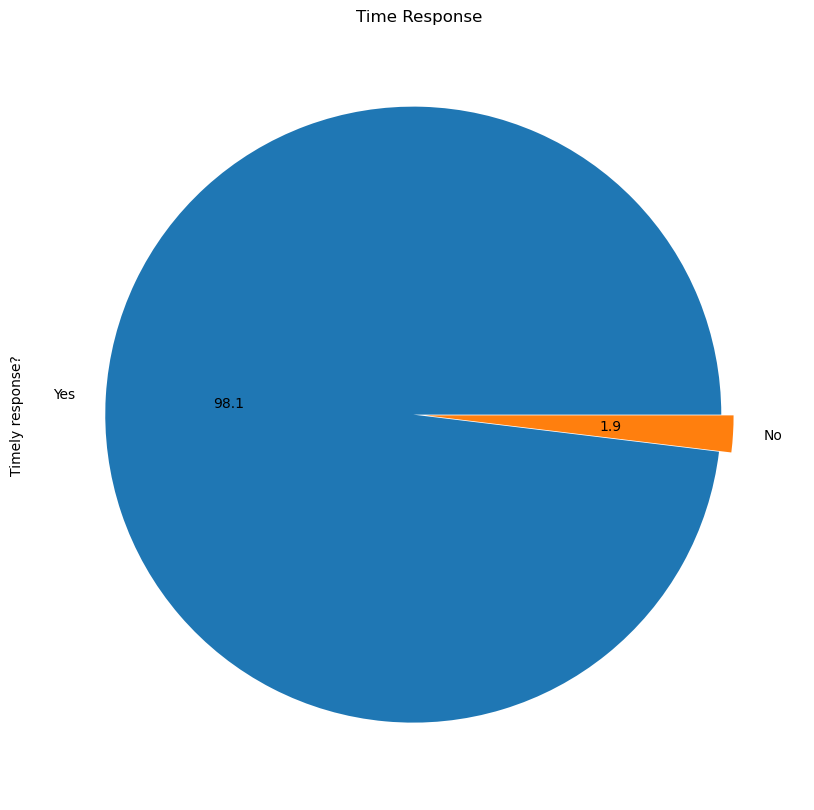

In [40]:
df['Timely response?'].value_counts().plot.pie(figsize=(10,10),autopct='%.1f',title='Time Response',explode=[0.02,0.02])

> So The Company response so very fast to consumer complaint.

<AxesSubplot:title={'center':'Company Response to Consumer'}>

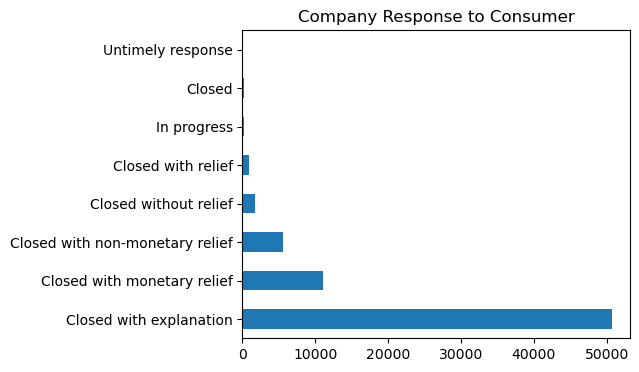

In [41]:
df['Company response to consumer'].value_counts().plot.barh(figsize=(5,4),title='Company Response to Consumer')